## **Alfano 2014 vs Celestrak** </br>
celestrak에서 alfano 2014 알고리즘을 사용하는지 분석

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt
from math import exp

## **HBR에 따른 Probability**
AR = 1, Range = 1000m, HBR = 1m,2m,5m,10m,20m,40m

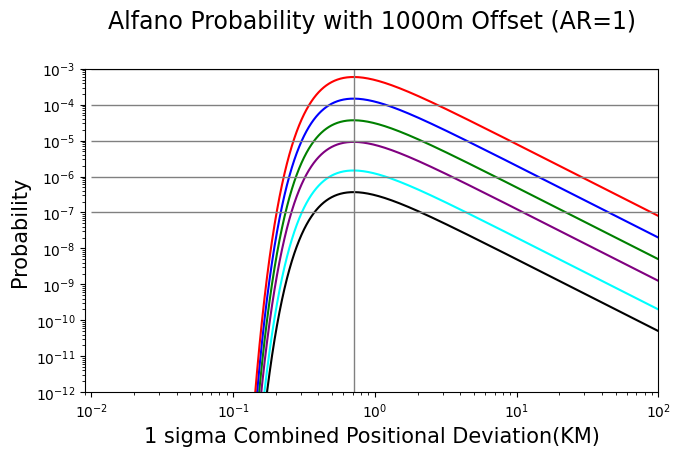

In [2]:
x_e=1.0
HBR=[0.001,0.002,0.005,0.01,0.02,0.04]
colors = ['black', 'cyan', 'purple', 'g', 'b', 'r']  # 원하는 색상을 리스트에 지정

root=0.001
alpha=1

plt.figure(figsize=(7.4,4.2))
for hbr, color in zip(HBR,colors):
    x,y=[],[]
    root=0.001

    for j in range(700):
        sigma_x=x_e/root
        x.append(sigma_x)
        y.append(exp(-x_e**2/(2*sigma_x**2))*(1-exp(-alpha*hbr**2/(2*sigma_x**2))))
        # alpha+=0.01
        root+=0.01
    plt.plot(x,y,color=color)

plt.hlines(1e-03, 0.01, 100, color='gray', linestyle='solid', linewidth=1)
plt.hlines(1e-04, 0.01, 100, color='gray', linestyle='solid', linewidth=1)
plt.hlines(1e-05, 0.01, 100, color='gray', linestyle='solid', linewidth=1)
plt.hlines(1e-06, 0.01, 100, color='gray', linestyle='solid', linewidth=1)
plt.hlines(1e-07, 0.01, 100, color='gray', linestyle='solid', linewidth=1)  
plt.vlines(x[y.index(max(y))], 1e-12, 1e-3, color='gray', linestyle='solid', linewidth=1)
plt.xlim(0.009,100)
plt.ylim(1e-12,1e-03)
plt.yscale('log', base=10)
plt.xscale('log', base=10)

plt.xlabel('1 sigma Combined Positional Deviation(KM)',fontsize=15)
plt.ylabel('Probability',fontsize=15)
plt.title('Alfano Probability with 1000m Offset (AR=1)',fontsize=17,y=1.1)
plt.show()

## **HBR에 따른 maximum probability**
AR = 1, Range= variable HBR = 1m,2m,5m,10m,20m,40m</br>


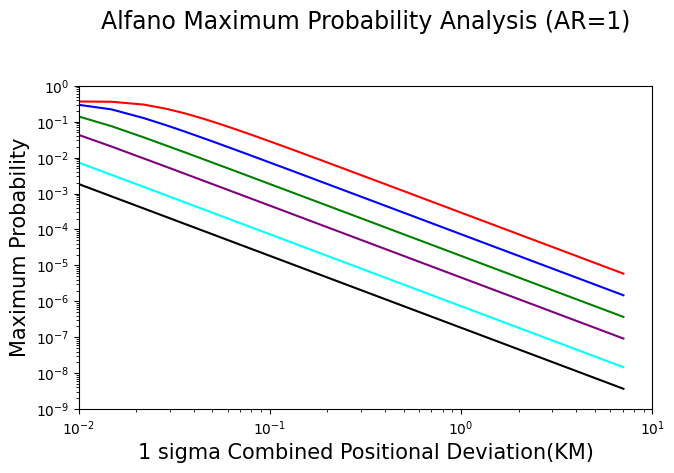

In [3]:
x_e=1.0
HBR=[0.001,0.002,0.005,0.01,0.02,0.04]
colors = ['black', 'cyan', 'purple', 'g', 'b', 'r']  # 원하는 색상을 리스트에 지정

root=0.001
alpha=1

plt.figure(figsize=(7.4,4.2))
for hbr, color in zip(HBR,colors):
    x,y=[],[]
    x_e=0.001
    for j in range(1000):
        sigma_x = x_e/sqrt(2)
        x.append(sigma_x)
        y.append(exp(-x_e**2/(2*sigma_x**2))*(1-exp(-alpha*hbr**2/(2*sigma_x**2))))
        # alpha+=0.01
        x_e+=0.01
    plt.plot(x,y,color=color)
plt.yticks([1e-4,1e-3, 1e-2, 1e-1], ['0.0001','0.001', '0.01', '0.1'])
plt.xlim(0.01,10)
plt.ylim(1e-9,1)
plt.yscale('log', base=10)
plt.xscale('log', base=10)
plt.xlabel('1 sigma Combined Positional Deviation(KM)',fontsize=15)
plt.ylabel('Maximum Probability',fontsize=15)
plt.title('Alfano Maximum Probability Analysis (AR=1)',fontsize=17,y=1.15)
# 그래프 표시
plt.show()

## **HBR 표준편차 분포**

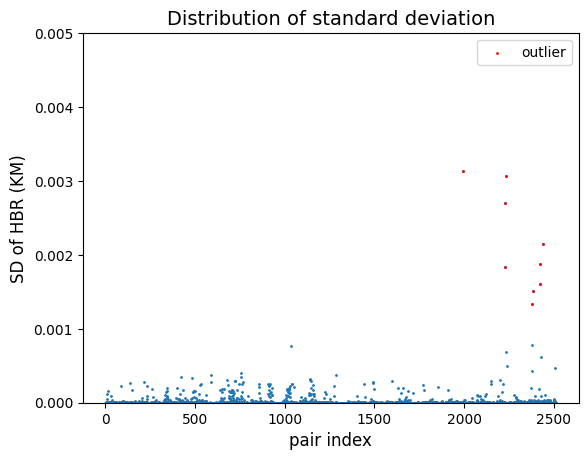

In [4]:
data = pd.read_csv('../conjunction_assesement_result/Spacemap_CA_result(Variable_HBR)/Spacemap_CA_09m24d13h_HBR.csv')

#위성번호로 그룹 데이터프레임 생성, 개수와 표준편차 계산
pair = data.groupby(['NORAD_CAT_ID_1', 'NORAD_CAT_ID_2']).agg({'HBR_CELESTRAK': ['count', 'std']}).reset_index()
pair.columns = ['satno', 'satno2', 'count', 'std_dev']

# Conjunction event 2회이상인 pair만 저장.
duplicated_pair = pair[pair['count'] > 1]
duplicated_pair = duplicated_pair.reset_index()

# duplicated_pair의 표준편차의 분포
plt.scatter(range(len(duplicated_pair)),duplicated_pair['std_dev'],s=1)
plt.scatter(list(duplicated_pair[duplicated_pair['std_dev']>0.001].index),\
            duplicated_pair[duplicated_pair['std_dev']>0.001]['std_dev'],color='r',s=1,label='outlier') # 0.001보다 큰 값 표시

plt.xlabel("pair index",fontsize=12)
plt.ylabel("SD of HBR (KM)",fontsize=12)
plt.title("Distribution of standard deviation",fontsize=14)
plt.ylim(0,0.005)
plt.legend()